### Birth Rates 2022-2023

My background is General Nursing, Childrens Nursing, Midwifery and lactation Consultancy. Because of this I choose for this assignment to look at and analyse the birth rates in Ireland for 2022 and 2023. At the time of doing this assignment the figures for 2024 were not available.

Importing libraries

In [117]:
import os
import requests
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import the data

In [118]:
file_path = "birth records 2022-23.csv"

df = pd.read_csv(file_path)


Checking the data

In [119]:
print(df.head())

   Year   County of Residence  Births Registered  First Births Registered  \
0  2022               Ireland              57495                  22939.0   
1  2022     Cork City Council               1164                      NaN   
2  2022  Clare County Council               1279                      NaN   
3  2022  Cavan County Council               1039                      NaN   
4  2022   Cork County Council               4906                      NaN   

   Births within Marriage  Births outside Marriage  \
0                   32757                    24738   
1                     592                      572   
2                     734                      545   
3                     600                      439   
4                    3036                     1870   

   Average Age of Mother - First Births only  \
0                                       31.5   
1                                       31.3   
2                                       32.2   
3                   

In [120]:
print(df.tail())

    Year              County of Residence  Births Registered  \
59  2023         Tipperary County Council               1736   
60  2023  Waterford City & County Council               1290   
61  2023         Westmeath County Council               1089   
62  2023           Wicklow County Council               1588   
63  2023           Wexford County Council               1772   

    First Births Registered  Births within Marriage  Births outside Marriage  \
59                      NaN                     930                      806   
60                      NaN                     719                      571   
61                      NaN                     616                      473   
62                      NaN                     920                      668   
63                      NaN                     891                      881   

    Average Age of Mother - First Births only  \
59                                       30.6   
60                                  

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Year                                                    64 non-null     int64  
 1   County of Residence                                     64 non-null     object 
 2   Births Registered                                       64 non-null     int64  
 3   First Births Registered                                 2 non-null      float64
 4   Births within Marriage                                  64 non-null     int64  
 5   Births outside Marriage                                 64 non-null     int64  
 6   Average Age of Mother - First Births only               64 non-null     float64
 7   Average Age of Mothers First Births - outside marriage  64 non-null     float64
 8   Average Age of Mother - outside Marriage  

Print the column names. This is useful when extracting the data to know what each column name is

In [122]:
print(df.columns)

Index(['Year', 'County of Residence', 'Births Registered',
       'First Births Registered', 'Births within Marriage',
       'Births outside Marriage', 'Average Age of Mother - First Births only',
       'Average Age of Mothers First Births - outside marriage',
       'Average Age of Mother - outside Marriage', 'Average Age of Mothers'],
      dtype='object')


In [123]:
print(df.describe())

              Year  Births Registered  First Births Registered  \
count    64.000000          64.000000                 2.000000   
mean   2022.500000        3503.656250             22699.000000   
std       0.503953        9610.831996               339.411255   
min    2022.000000         338.000000             22459.000000   
25%    2022.000000         937.750000             22579.000000   
50%    2022.500000        1472.000000             22699.000000   
75%    2023.000000        2308.750000             22819.000000   
max    2023.000000       57495.000000             22939.000000   

       Births within Marriage  Births outside Marriage  \
count               64.000000                64.000000   
mean              2033.468750              1470.187500   
std               5575.492188              4041.341298   
min                216.000000               122.000000   
25%                533.750000               395.000000   
50%                829.500000               624.000000   

In [124]:
df.dtypes

Year                                                        int64
County of Residence                                        object
Births Registered                                           int64
First Births Registered                                   float64
Births within Marriage                                      int64
Births outside Marriage                                     int64
Average Age of Mother - First Births only                 float64
Average Age of Mothers First Births - outside marriage    float64
Average Age of Mother - outside Marriage                  float64
Average Age of Mothers                                    float64
dtype: object

Bar plot of total births per year

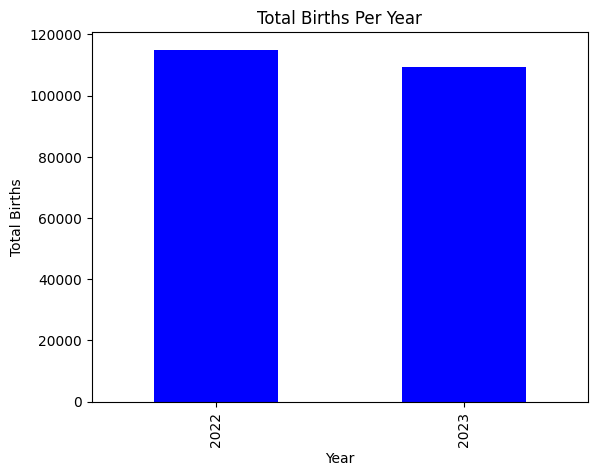

In [125]:
total_births_per_year = df.groupby('Year')['Births Registered'].sum()

total_births_per_year.plot(kind='bar', color='blue')

plt.title('Total Births Per Year')
plt.xlabel('Year')
plt.ylabel('Total Births')

# Show the plot
plt.show()

From this bar chart we can see that the birth rate dropped in 2023. From the dataset we can see that the birth rate was 57495 in 2022 and 54622 in 2023. The figures for 2024 were not available at this time. 

Pie chart representing primaparous mothers (first births) and multiparous mothers (more than once but less than five times) in 2022 .

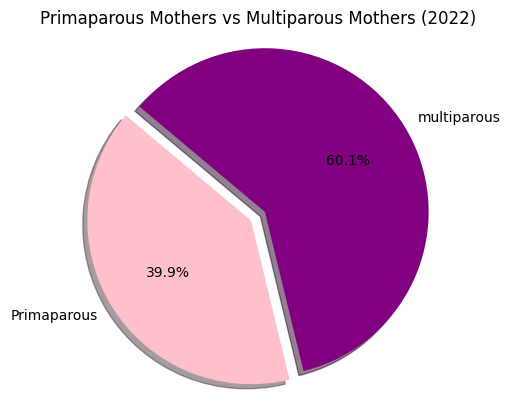

In [126]:
# Data to plot
labels = ['Primaparous', 'multiparous']
sizes = [22939, 34556]  # Ensure sizes match the length of labels
colors = ['pink', 'purple']
explode = (0.1, 0)  # explode 1st slice

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Primaparous Mothers vs Multiparous Mothers (2022)')
plt.show()

pie chart representing the data for 2023

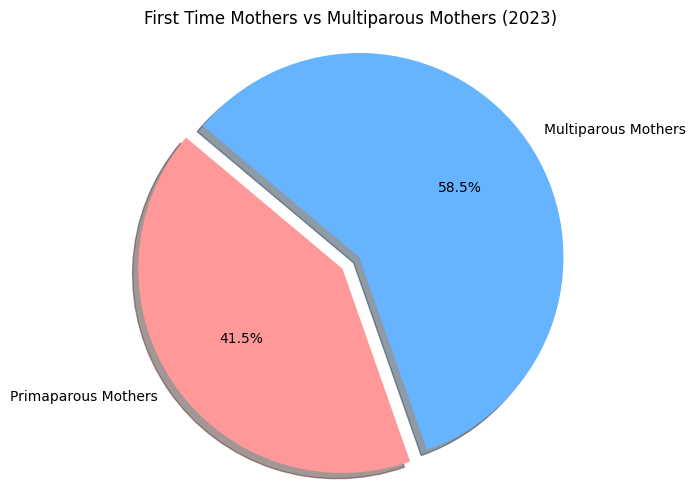

In [127]:
labels = ['Primaparous Mothers', 'Multiparous Mothers']
sizes = [22459, 31683] 
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.title('First Time Mothers vs Multiparous Mothers (2023)')
plt.show()

Dropping the 'Ireland' column in order to visualise each individual county

In [128]:
df = df[df['County of Residence'] != 'Ireland']

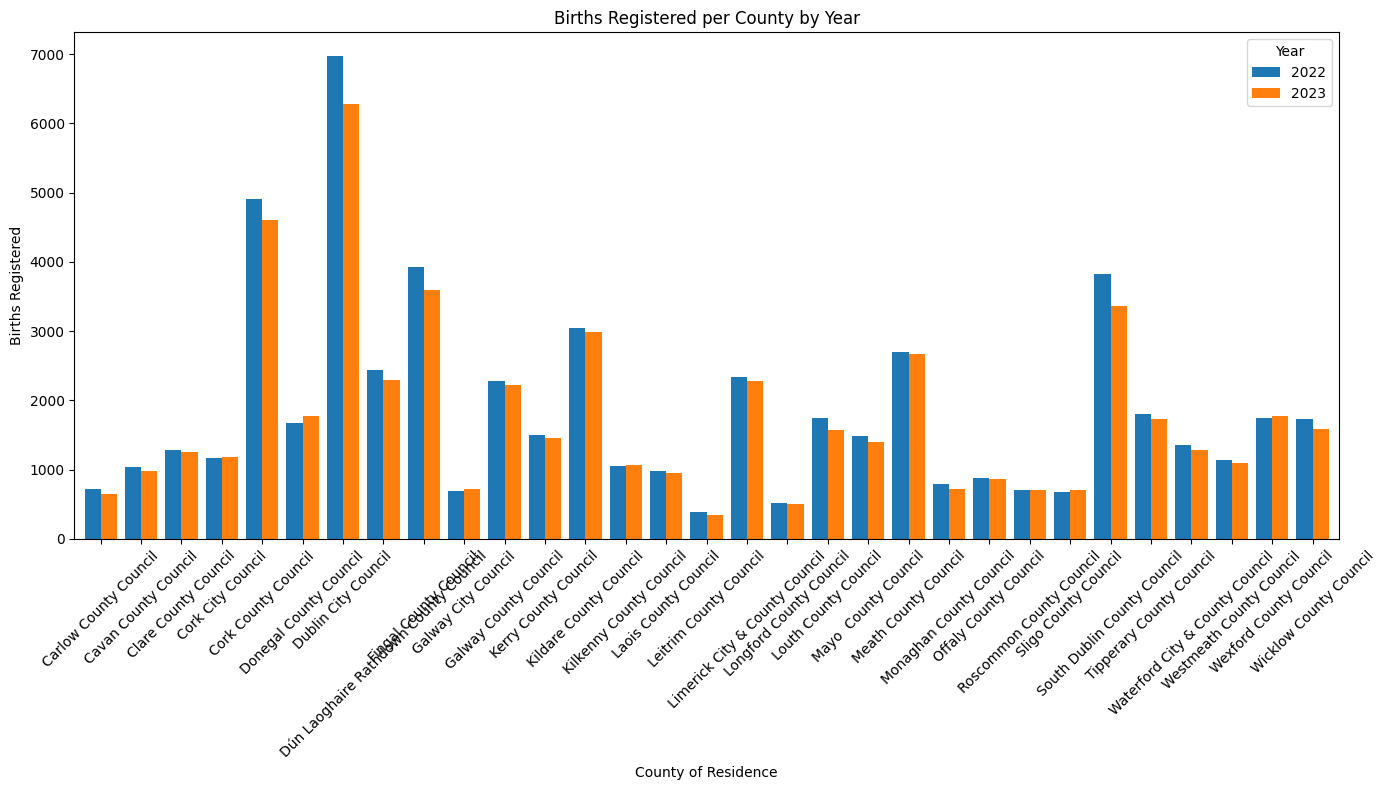

In [131]:
# Ensure the DataFrame df is not empty
if not df.empty:
	# Group the data by 'County of Residence' and 'Year' and sum the 'Births Registered'
	county_year_data = df.groupby(['County of Residence', 'Year'])['Births Registered'].sum().unstack()

	# Plot the bar graph
	county_year_data.plot(kind='bar', figsize=(14, 8), width=0.8)

	plt.title('Births Registered per County by Year')
	plt.xlabel('County of Residence')
	plt.ylabel('Births Registered')
	plt.xticks(rotation=45)
	plt.legend(title='Year')
	plt.tight_layout()

	# Show the plot
	plt.show()
else:
	print("The DataFrame 'df' is empty. Please check the data import step.")

What this graph shows us is the births per county of residence for both 2022 and 2023. This can lead to decisions by the HSE where to focus maternity and PHN resources. 

First time mothers

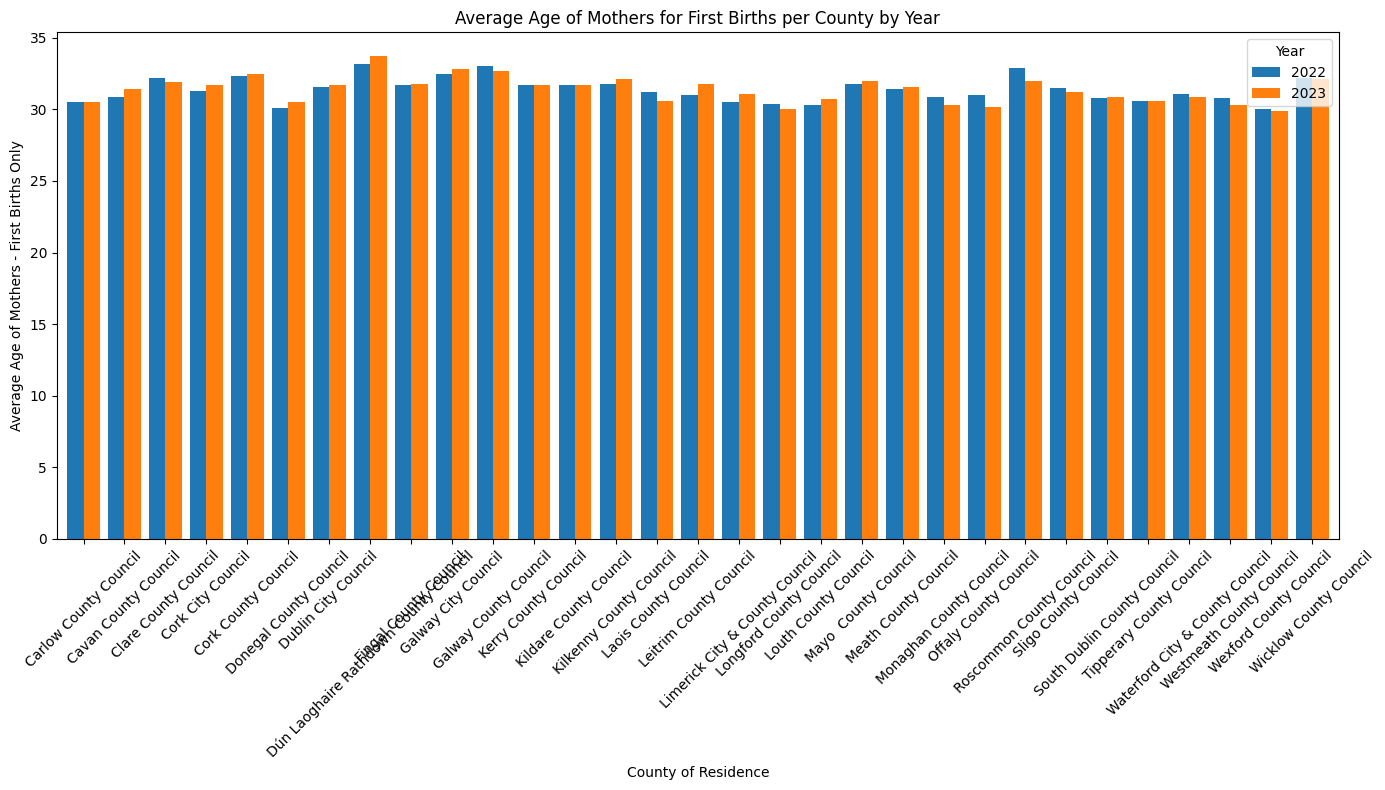

In [133]:
if not df.empty:
	# Group the data by 'County of Residence' and 'Year' and sum the 'Average Age of Mother - First Births only'
	average_age_data = df.groupby(['County of Residence', 'Year'])['Average Age of Mother - First Births only'].mean().unstack()

	# Plot the bar graph
	average_age_data.plot(kind='bar', figsize=(14, 8), width=0.8)

	plt.title('Average Age of Mothers for First Births per County by Year')
	plt.xlabel('County of Residence')
	plt.ylabel('Average Age of Mothers - First Births Only')
	plt.xticks(rotation=45)
	plt.legend(title='Year')
	plt.tight_layout()

	# Show the plot
	plt.show()
else:
	print("The DataFrame 'df' is empty. Please check the data import step.")

This graph tells us that the average age of first time mothers is fairly uniform over the counties. The average age is early 30's. This would inform HSE decision making as very young and older mother require age specific information and healthcare. 

### END